# Vacancy Analysis

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Technology Stack Analysis

### Task:
- Analyze the technology stacks mentioned in job listings to identify commonly required skills.
- Determine the frequency of specific technologies (e.g., SQL, Django, Docker) to understand their popularity among employers.

In [35]:
vacancy_df = pd.read_csv("python.csv")
vacancy_df = vacancy_df.dropna()

vacancy_df.head()

,title,location,stack,url
0,Backend Software Engineer (Python) — Relocatio...,"за кордоном, віддалено","['SQL', 'Django', 'Docker', 'Ansible', 'TeamCi...",https://jobs.dou.ua/companies/revolut/vacancie...
1,Senior Software Engineer (Python),віддалено,"['SQL', 'FastAPI', 'Kubernetes', 'AsyncIO']",https://jobs.dou.ua/companies/competera/vacanc...
2,Senior Python Developer,"Київ, Дніпро, Запоріжжя, віддалено","['Ansible', 'Git', 'CI/CD', 'SOLID']",https://jobs.dou.ua/companies/the-gravity-agen...
3,Experienced React and python developer,віддалено,"['SQL', 'Docker', 'Git', 'Requests', 'REST']",https://jobs.dou.ua/companies/windsor-ai/vacan...
4,Fullstack Python/React Developer,Запоріжжя,"['SQL', 'Django', 'Flask', 'FastAPI', 'MongoDB...",https://jobs.dou.ua/companies/elementica/vacan...


In [40]:
stack_series = vacancy_df["stack"]

stack_df = pd.DataFrame(stack_series.str.strip("['']").str.split("', '").explode())

technology_counts = stack_df.value_counts()
technology_counts = technology_counts.reset_index().set_index("stack")

technology_counts.head()

,count
stack,
SQL,68
REST,52
Git,45
Docker,43
Django,41


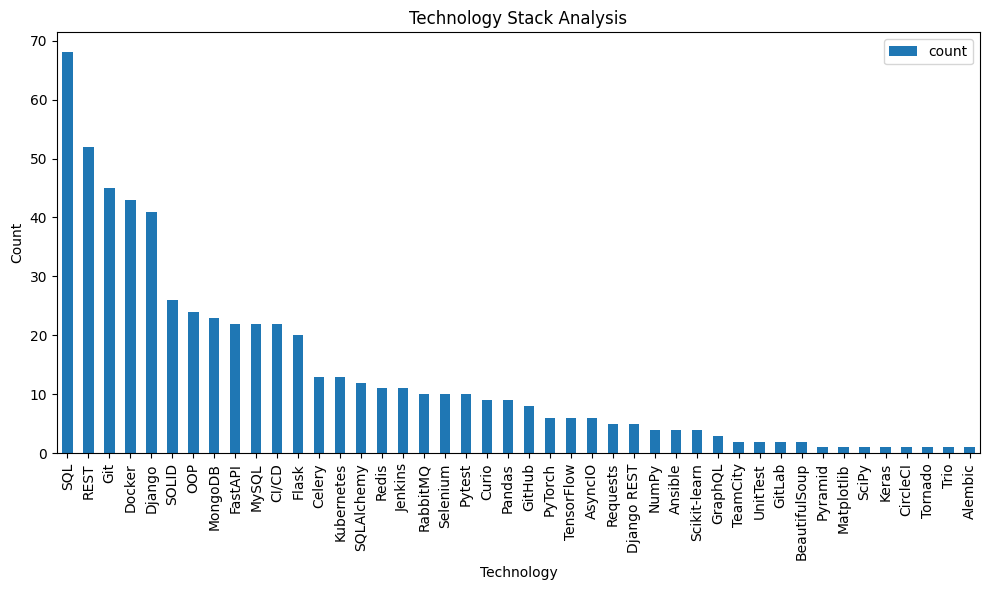

In [41]:
technology_counts.plot(kind="bar", figsize=(10, 6))

plt.xlabel("Technology")
plt.ylabel("Count")
plt.title("Technology Stack Analysis")

plt.xticks()
plt.tight_layout()

plt.show()